# Melbourne House Prices

<img src="image.jpg">

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
df = pd.read_csv("./MELBOURNE_HOUSE_PRICES_LESS.csv")
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


### analyze & visualize the data

In [3]:
df = df.dropna(axis=0, how='any')
df.head(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council
5,Airport West,4/32 Earl St,2,t,530000.0,S,Jellis,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council
6,Airport West,3/74 Hawker St,2,u,540000.0,S,Barry,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council
7,Airport West,1/26 Highridge Cr,3,h,715000.0,SP,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council
9,Albert Park,18 Mills St,3,h,1925000.0,S,Cayzer,1/04/2017,3206,Southern Metropolitan,3280,3.0,Port Phillip City Council
10,Albion,3/15 Drummartin St,3,u,515000.0,S,Douglas,1/04/2017,3020,Western Metropolitan,2185,10.5,Brimbank City Council


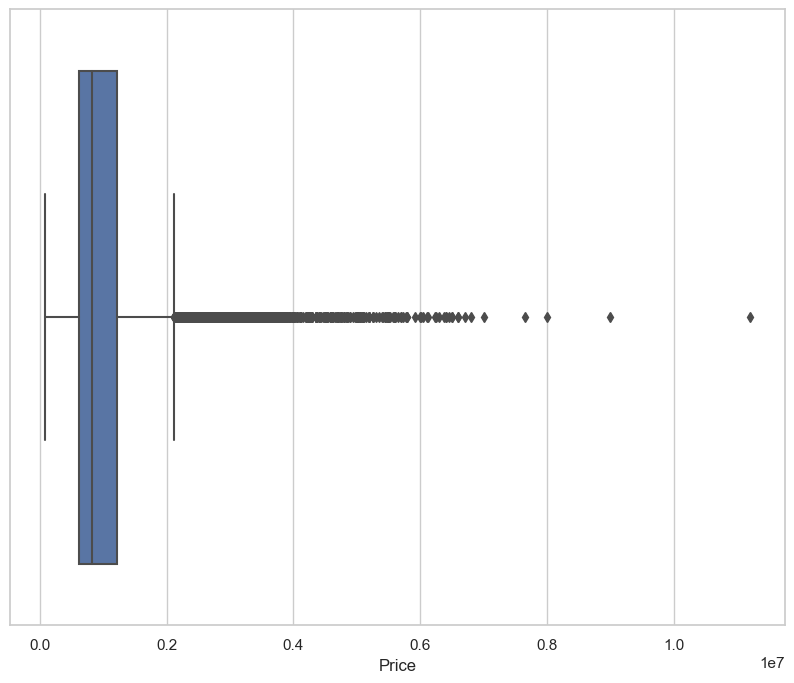

In [4]:
# Graphical way to show the numerical data distribution
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style="whitegrid")
plt.figure(figsize=(10,8))
ax = sns.boxplot(x='Price', data=df)

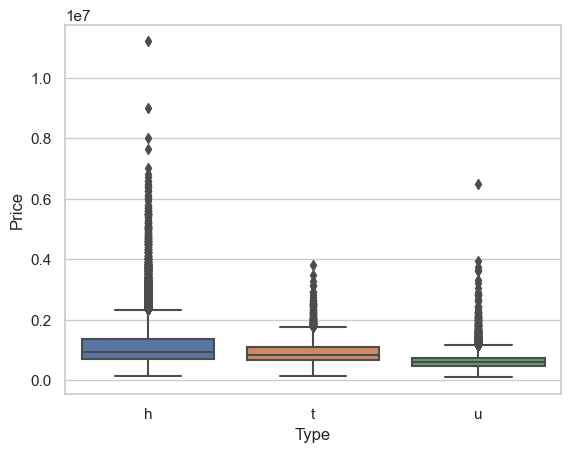

In [5]:
ax = sns.boxplot(x='Type', y='Price', data=df, orient="v")

<Figure size 1400x800 with 0 Axes>

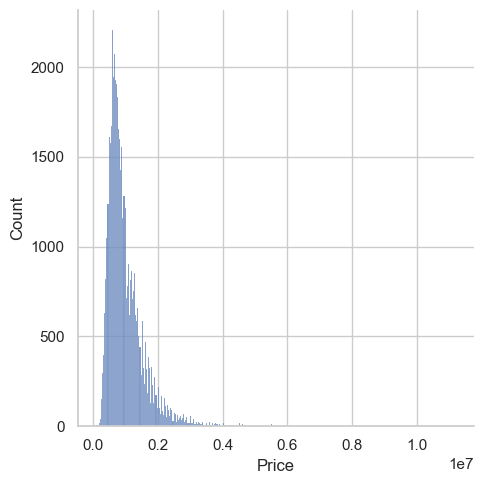

In [6]:
filter_data = df.dropna(subset=['Price'])
plt.figure(figsize=(14,8))
sns.displot(filter_data['Price'], kde=False)

<Axes: ylabel='house_type'>

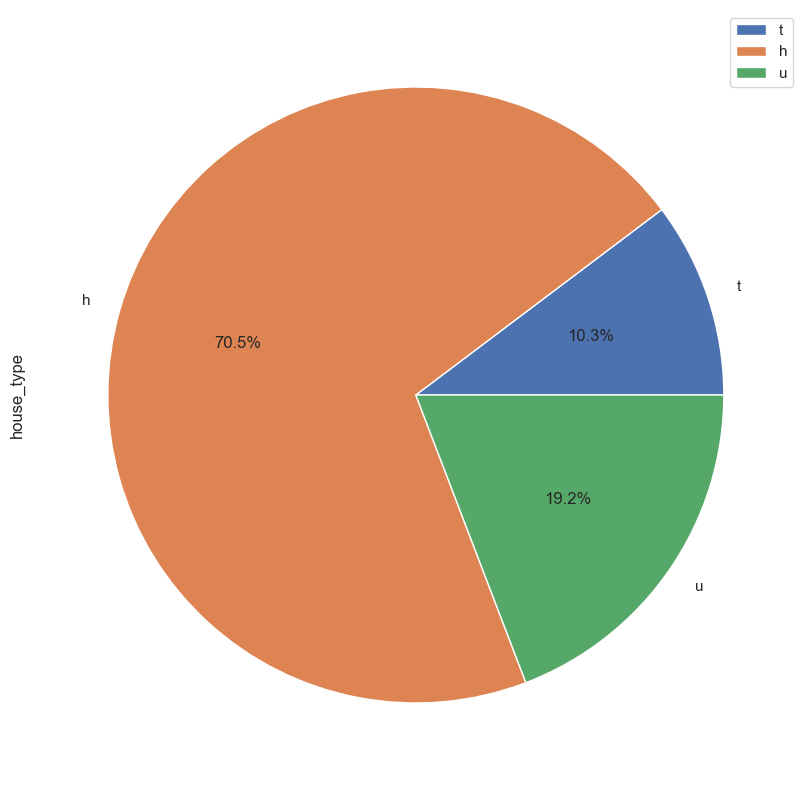

In [7]:
type_counts = df['Type'].value_counts()
df2 = pd.DataFrame({'house_type': type_counts}, 
                     index = ['t', 'h', 'u']
                   )
df2.plot.pie(y='house_type', figsize=(10,10), autopct='%1.1f%%')

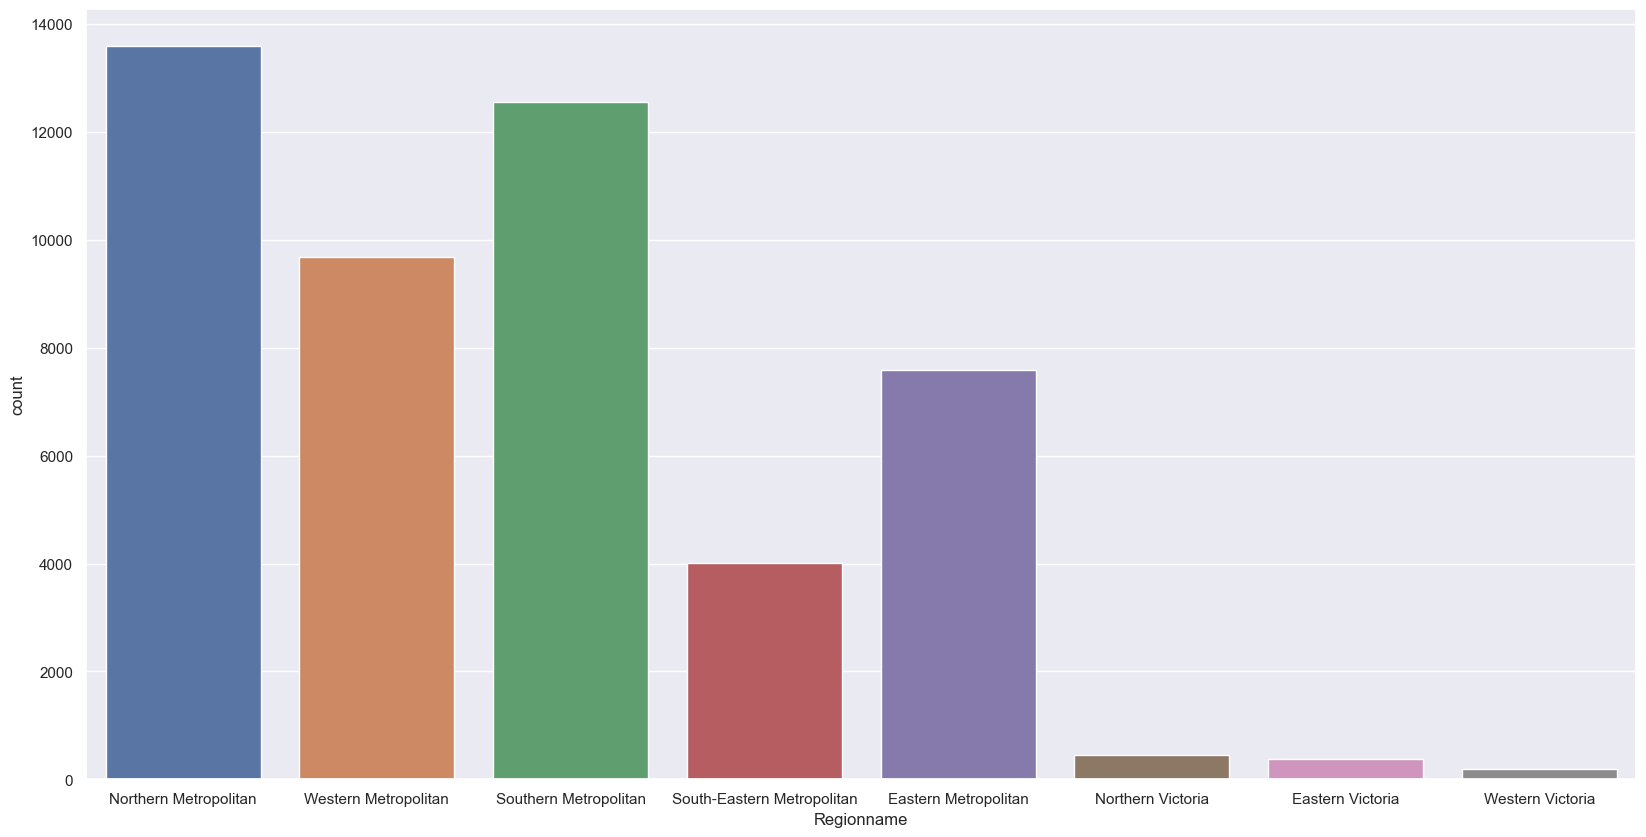

In [8]:
sns.set(style='darkgrid')
plt.figure(figsize=(20,10))
ax = sns.countplot(x='Regionname', data=df)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48433 entries, 0 to 63020
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         48433 non-null  object 
 1   Address        48433 non-null  object 
 2   Rooms          48433 non-null  int64  
 3   Type           48433 non-null  object 
 4   Price          48433 non-null  float64
 5   Method         48433 non-null  object 
 6   SellerG        48433 non-null  object 
 7   Date           48433 non-null  object 
 8   Postcode       48433 non-null  int64  
 9   Regionname     48433 non-null  object 
 10  Propertycount  48433 non-null  int64  
 11  Distance       48433 non-null  float64
 12  CouncilArea    48433 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 5.2+ MB


### clean the data

In [10]:

df['Type'].unique()


array(['h', 't', 'u'], dtype=object)

### Type:
- h - house,cottage,villa, semi,terrace;
- u - unit, duplex;
- t - townhouse;

In [11]:
df['house_types'] = df['Type'].map({'h': 0, 'u': 1, 't':2})
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea,house_types
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council,0
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council,0
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council,0
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council,0
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63016,Frankston,4/34 Petrie St,2,u,347700.0,SP,Aquire,31/03/2018,3199,South-Eastern Metropolitan,17055,38.0,Frankston City Council,1
63017,Preston,229 Murray Rd,3,h,808000.0,S,RW,31/03/2018,3072,Northern Metropolitan,14577,8.4,Darebin City Council,0
63018,Roxburgh Park,3 Carr Pl,3,h,566000.0,S,Raine,31/03/2018,3064,Northern Metropolitan,5833,20.6,Hume City Council,0
63019,Roxburgh Park,9 Parker Ct,3,h,500000.0,S,Raine,31/03/2018,3064,Northern Metropolitan,5833,20.6,Hume City Council,0


In [12]:
df['Regionname'].unique()

array(['Northern Metropolitan', 'Western Metropolitan',
       'Southern Metropolitan', 'South-Eastern Metropolitan',
       'Eastern Metropolitan', 'Northern Victoria', 'Eastern Victoria',
       'Western Victoria'], dtype=object)

In [13]:
df['region_name'] = df['Regionname'].map({'Northern Metropolitan': 0, 'Western Metropolitan': 1, 'Southern Metropolitan': 2, 'South-Eastern Metropolitan': 3, 'Eastern Metropolitan': 4, 'Northern Victoria': 5, 'Western Victoria': 6, 'Eastern Victoria': 7})
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea,house_types,region_name
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council,0,0
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council,0,0
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council,0,0
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council,0,1
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63016,Frankston,4/34 Petrie St,2,u,347700.0,SP,Aquire,31/03/2018,3199,South-Eastern Metropolitan,17055,38.0,Frankston City Council,1,3
63017,Preston,229 Murray Rd,3,h,808000.0,S,RW,31/03/2018,3072,Northern Metropolitan,14577,8.4,Darebin City Council,0,0
63018,Roxburgh Park,3 Carr Pl,3,h,566000.0,S,Raine,31/03/2018,3064,Northern Metropolitan,5833,20.6,Hume City Council,0,0
63019,Roxburgh Park,9 Parker Ct,3,h,500000.0,S,Raine,31/03/2018,3064,Northern Metropolitan,5833,20.6,Hume City Council,0,0


In [14]:
df['Price'] = round((df['Price']), 1)
df['Price']

0        1490000.0
1        1220000.0
2        1420000.0
3        1515000.0
4         670000.0
           ...    
63016     347700.0
63017     808000.0
63018     566000.0
63019     500000.0
63020     545000.0
Name: Price, Length: 48433, dtype: float64

### split the data

- X: number of rooms, house types and region
- y: price

In [15]:
X = df[['Rooms', 'house_types', 'region_name']]
y = df['Price']

In [16]:
X

,Rooms,house_types,region_name
0,3,0,0
1,3,0,0
2,3,0,0
3,3,0,1
4,2,0,1
...,...,...,...
63016,2,1,3
63017,3,0,0
63018,3,0,0
63019,3,0,0


In [17]:
y

0        1490000.0
1        1220000.0
2        1420000.0
3        1515000.0
4         670000.0
           ...    
63016     347700.0
63017     808000.0
63018     566000.0
63019     500000.0
63020     545000.0
Name: Price, Length: 48433, dtype: float64

### train test split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2) # shuffle = durchmischen, default is shuffle = True

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size= 0.8, random_state= 10, shuffle= True) #  random_state= 10 -> seed = 10 


In [19]:
print(len(X))
print(len(X_train))
print(len(X_test))


48433
38746
9687


### fit and predict the model

In [20]:
# create the model
from sklearn import linear_model
reg = linear_model.LinearRegression()

# fit the model
reg.fit(X_train,y_train)

# make prediction with test_data
y_predicted = reg.predict(X_test)
print(y_predicted)
print(y_test)

[ 736037.8945816  1019456.49838135  968560.9841553  ... 1300616.61028814
 1070352.01260739  836805.21480429]
16234     580000.0
27858    1450000.0
19133     740000.0
17158    1100000.0
35281     987500.0
           ...    
46782     655000.0
58403     780000.0
58983    1120000.0
797       975000.0
22765     730000.0
Name: Price, Length: 9687, dtype: float64


### evaluate the model

In [21]:
reg.score(X_test, y_test)

0.18661808008396996

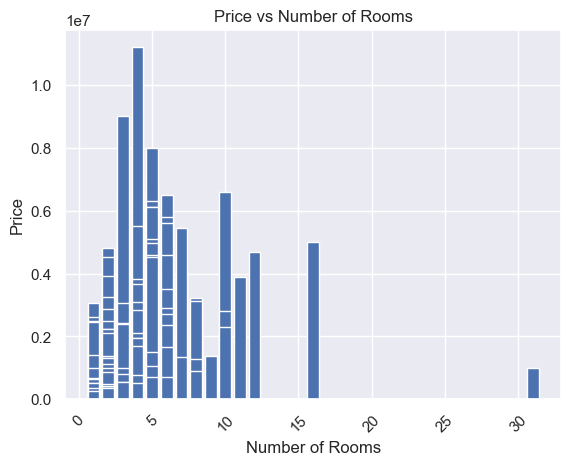

In [22]:
import matplotlib.pyplot as plt

# Create a bar plot with rotations
plt.bar(df['Rooms'], df['Price'])
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees

# Add labels and title
plt.xlabel('Number of Rooms')
plt.ylabel('Price')
plt.title('Price vs Number of Rooms')

# Show the plot
plt.show()

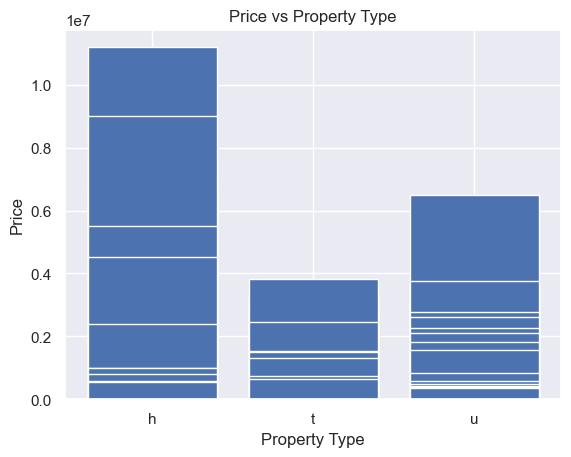

In [23]:
# Create a bar plot with rotations
plt.bar(df['Type'], df['Price'])

# Add labels and title
plt.xlabel('Property Type')
plt.ylabel('Price')
plt.title('Price vs Property Type')

# Show the plot
plt.show()

# Type:
- h - house,cottage,villa, semi,terrace;
- u - unit, duplex;
- t - townhouse;

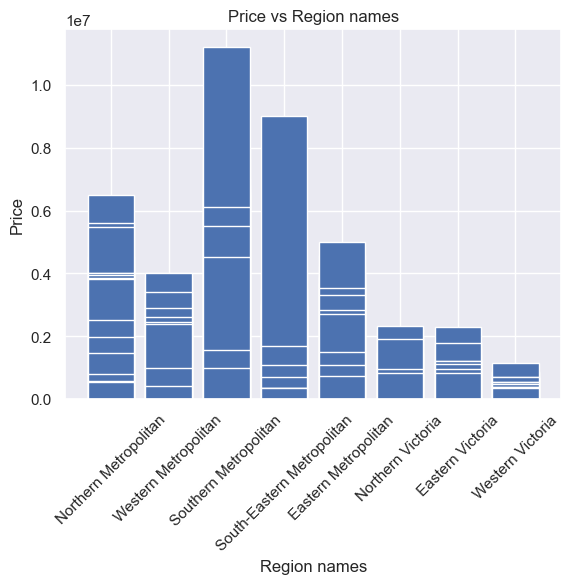

In [24]:
# Create a bar plot with rotations
plt.bar(df['Regionname'], df['Price'])
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees


# Add labels and title
plt.xlabel('Region names')
plt.ylabel('Price')
plt.title('Price vs Region names')

# Show the plot
plt.show()

### prediction of the price if we have 2 rooms, house type is house/villa and the district is: Northern Metropolitan

In [25]:
reg.predict([[2, 0, 0]])

c:\Python\Python3113\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([738296.38647456])

### create new dataset with only one column: price

In [26]:
prediction_df= df[['Rooms', 'house_types', 'region_name']]
prediction_df

,Rooms,house_types,region_name
0,3,0,0
1,3,0,0
2,3,0,0
3,3,0,1
4,2,0,1
...,...,...,...
63016,2,1,3
63017,3,0,0
63018,3,0,0
63019,3,0,0


In [27]:
prediction_df.to_csv('./melbourne_dataset_new.csv', index=False)

In [28]:
predicted_prices = reg.predict(prediction_df)
predicted_prices

array([968560.9841553, 968560.9841553, 968560.9841553, ...,
       968560.9841553, 968560.9841553, 968560.9841553])

In [34]:
# attach the array to the dataframe
prediction_df['predicted_prices'] = predicted_prices.round(1)
prediction_df

C:\Users\Administrator\AppData\Local\Temp\ipykernel_972\1041671739.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prediction_df['predicted_prices'] = predicted_prices.round(1)


,Rooms,house_types,region_name,predicted_prices
0,3,0,0,968561.0
1,3,0,0,968561.0
2,3,0,0,968561.0
3,3,0,1,994008.7
4,2,0,1,763744.1
...,...,...,...,...
63016,2,1,3,736037.9
63017,3,0,0,968561.0
63018,3,0,0,968561.0
63019,3,0,0,968561.0


### save the result into a new csv file 

In [35]:
prediction_df.to_csv('./predicted_melbourne_prices.csv', index=False)

### save the model for future use using pickle

In [36]:
import pickle
# save the model
with open('./models/model_linear_reg_melb.pkl', mode='wb') as file:
    pickle.dump(reg, file)

### load the model

In [37]:
# Load the model
with open('./models/model_linear_reg_melb.pkl', mode='rb') as file:
    model2 = pickle.load(file)

print(model2.coef_)
print()
print(model2.intercept_)

[230264.59768075 -78601.76323202  25447.75711302]

277767.1911130629
